<a href="https://colab.research.google.com/github/SYasheel/AutomaticSleepScoring/blob/main/Yasheel/kmeans_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Aim of this notebook is to use PCA and K means clustering on concatenated good cycles and projecting features and sleep states on pc cloud.

This file used the concatenated data of good cycles obtained and clustered them, thereafter plotted sample waveforms from each cluster.





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/cn/donders/Nikhil')

In [ ]:
pip install emd

In [ ]:
pip install neurodsp


In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import os

# Import custom functions
from scripts.functions import *

##### finding optimum no. of clusters


--- Running K-Means Elbow Method for PFC ---
  K=2: Inertia=58210857.48
  K=3: Inertia=28010583.94
  K=4: Inertia=16215894.00
  K=5: Inertia=10972078.64
  K=6: Inertia=7955697.80
  K=7: Inertia=5705473.30
  K=8: Inertia=4500149.04
  K=9: Inertia=3589181.39
  K=10: Inertia=3034883.62


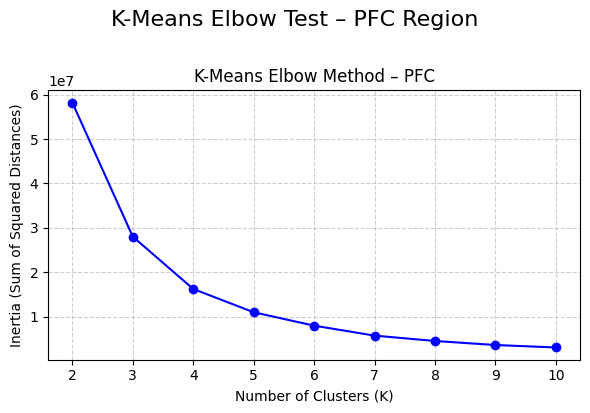


--- Running K-Means Elbow Method for HPC ---
  K=2: Inertia=53879647.29
  K=3: Inertia=26490008.66
  K=4: Inertia=15513905.39
  K=5: Inertia=10018362.21
  K=6: Inertia=7263478.31
  K=7: Inertia=5474984.03
  K=8: Inertia=4191454.38
  K=9: Inertia=3370915.31
  K=10: Inertia=2772046.17


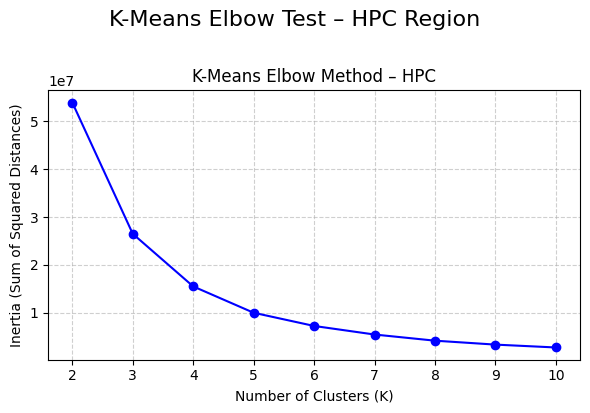

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

#data path
path_to_data = '/content/drive/MyDrive/cn/donders/'
os.chdir(path_to_data)

data_files = {
    'PFC': 'PFC_combined_resampled_data.h5',
    'HPC': 'HPC_combined_resampled_data.h5'
}

features = [
    'peak2trough', 'asc2desc', 'max_amp', 'peak_values',
    'trough_values', 'mean_if', 'max_if', 'range_if'
]

K = range(2, 11) #k  value range to test

for region, file in data_files.items():
    print(f"\n--- Running K-Means Elbow Method for {region} ---")

    #load data
    df = pd.read_hdf(file)
    data = df[features].dropna()

    inertia = []

    # KMeans loop
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
        print(f"  K={k}: Inertia={inertia[-1]:.2f}")

    # Plotting
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(K, inertia, 'bo-')
    ax.set_title(f'K-Means Elbow Method – {region}')
    ax.set_xlabel('Number of Clusters (K)')
    ax.set_ylabel('Inertia (Sum of Squared Distances)')
    ax.set_xticks(K)
    ax.grid(True, linestyle='--', alpha=0.6)
    plt.suptitle(f'K-Means Elbow Test – {region} Region', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


##### for both regions optimum no. of clusters is ==3

#### loading data/ all resampled waveforms


In [ ]:

hpc=pd.read_hdf('HPC_combined_resampled_data.h5')
pfc=pd.read_hdf('PFC_combined_resampled_data.h5')
hpc.head()


index  is_good  start_sample  stop_sample  duration  duration_samples  \
0      5        1         22751        23540       790               790   
1      6        1         23541        24448       908               908   
2      7        1         24449        26978      2530              2530   
3      8        1         26979        28949      1971              1971   
4     12        1         32339        34182      1844              1844   

   peak2trough  asc2desc   max_amp  trough_values  ...       119       120  \
0     0.209142  0.474233  0.733001      -0.716113  ... -0.166654 -0.145335   
1     0.441385  0.486994  0.600355      -0.498555  ... -0.171643 -0.150646   
2     0.220619  0.234213  5.015955      -3.275222  ... -2.221403 -1.992891   
3     0.644674  0.330440  5.012736      -2.362982  ... -1.611201 -1.442050   
4     0.385801  0.356276  2.503496      -2.261816  ... -1.161440 -1.026326   

        121       122       123       124       125       126       127  \
0 -0.124128 -0.103067 -0.082187 -0.061521 -0.041101 -0.020960 -0.001128   
1 -0.129443 -0.108088 -0.086633 -0.065131 -0.043633 -0.022193 -0.000859   
2 -1.745628 -1.481781 -1.203823 -0.914474 -0.616646 -0.313376 -0.007761   
3 -1.259923 -1.066560 -0.863897 -0.653974 -0.438964 -0.221099 -0.002664   
4 -0.886852 -0.743811 -0.598023 -0.450310 -0.301503 -0.152421 -0.003871   

   rat_id  
0       6  
1       6  
2       6  
3       6  
4       6  

[5 rows x 149 columns]

In [ ]:
pfc.head()

index  is_good  start_sample  stop_sample  duration  duration_samples  \
0      7        1         25228        26002       775               775   
1     10        1         30954        32944      1991              1991   
2     13        1         41029        42761      1733              1733   
3     28        1         74875        77334      2460              2460   
4     29        1         77335        78047       713               713   

   peak2trough  asc2desc   max_amp  trough_values  ...       119       120  \
0     0.756767  0.462529  0.373923      -0.063804  ... -0.051982 -0.047837   
1     0.753348  0.371016  1.535585      -0.631499  ... -0.478706 -0.431020   
2     0.718277  0.466608  1.765031      -0.516630  ... -0.310945 -0.273642   
3     0.723741  0.301703  1.034577      -0.614775  ... -0.425514 -0.376536   
4     0.667488  0.382906  0.269579      -0.041250  ... -0.029755 -0.027172   

        121       122       123       124       125       126       127  \
0 -0.043041 -0.037587 -0.031467 -0.024674 -0.017206 -0.009057 -0.000226   
1 -0.378346 -0.321425 -0.261074 -0.198165 -0.133602 -0.068320 -0.003252   
2 -0.234892 -0.195189 -0.155040 -0.114956 -0.075445 -0.037005 -0.000114   
3 -0.324295 -0.269807 -0.214142 -0.158393 -0.103643 -0.050933 -0.001229   
4 -0.024290 -0.021100 -0.017591 -0.013756 -0.009587 -0.005075 -0.000215   

   rat_id  
0       3  
1       3  
2       3  
3       3  
4       3  

[5 rows x 149 columns]

#### K_means clustering

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans

features=[ 'peak2trough', 'asc2desc', 'max_amp', 'peak_values', 'trough_values', 'mean_if', 'max_if', 'range_if']
data_subset = hpc[features].dropna()

In [ ]:

#taking n==3
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(data_subset)
data_subset['cluster'] = cluster_labels

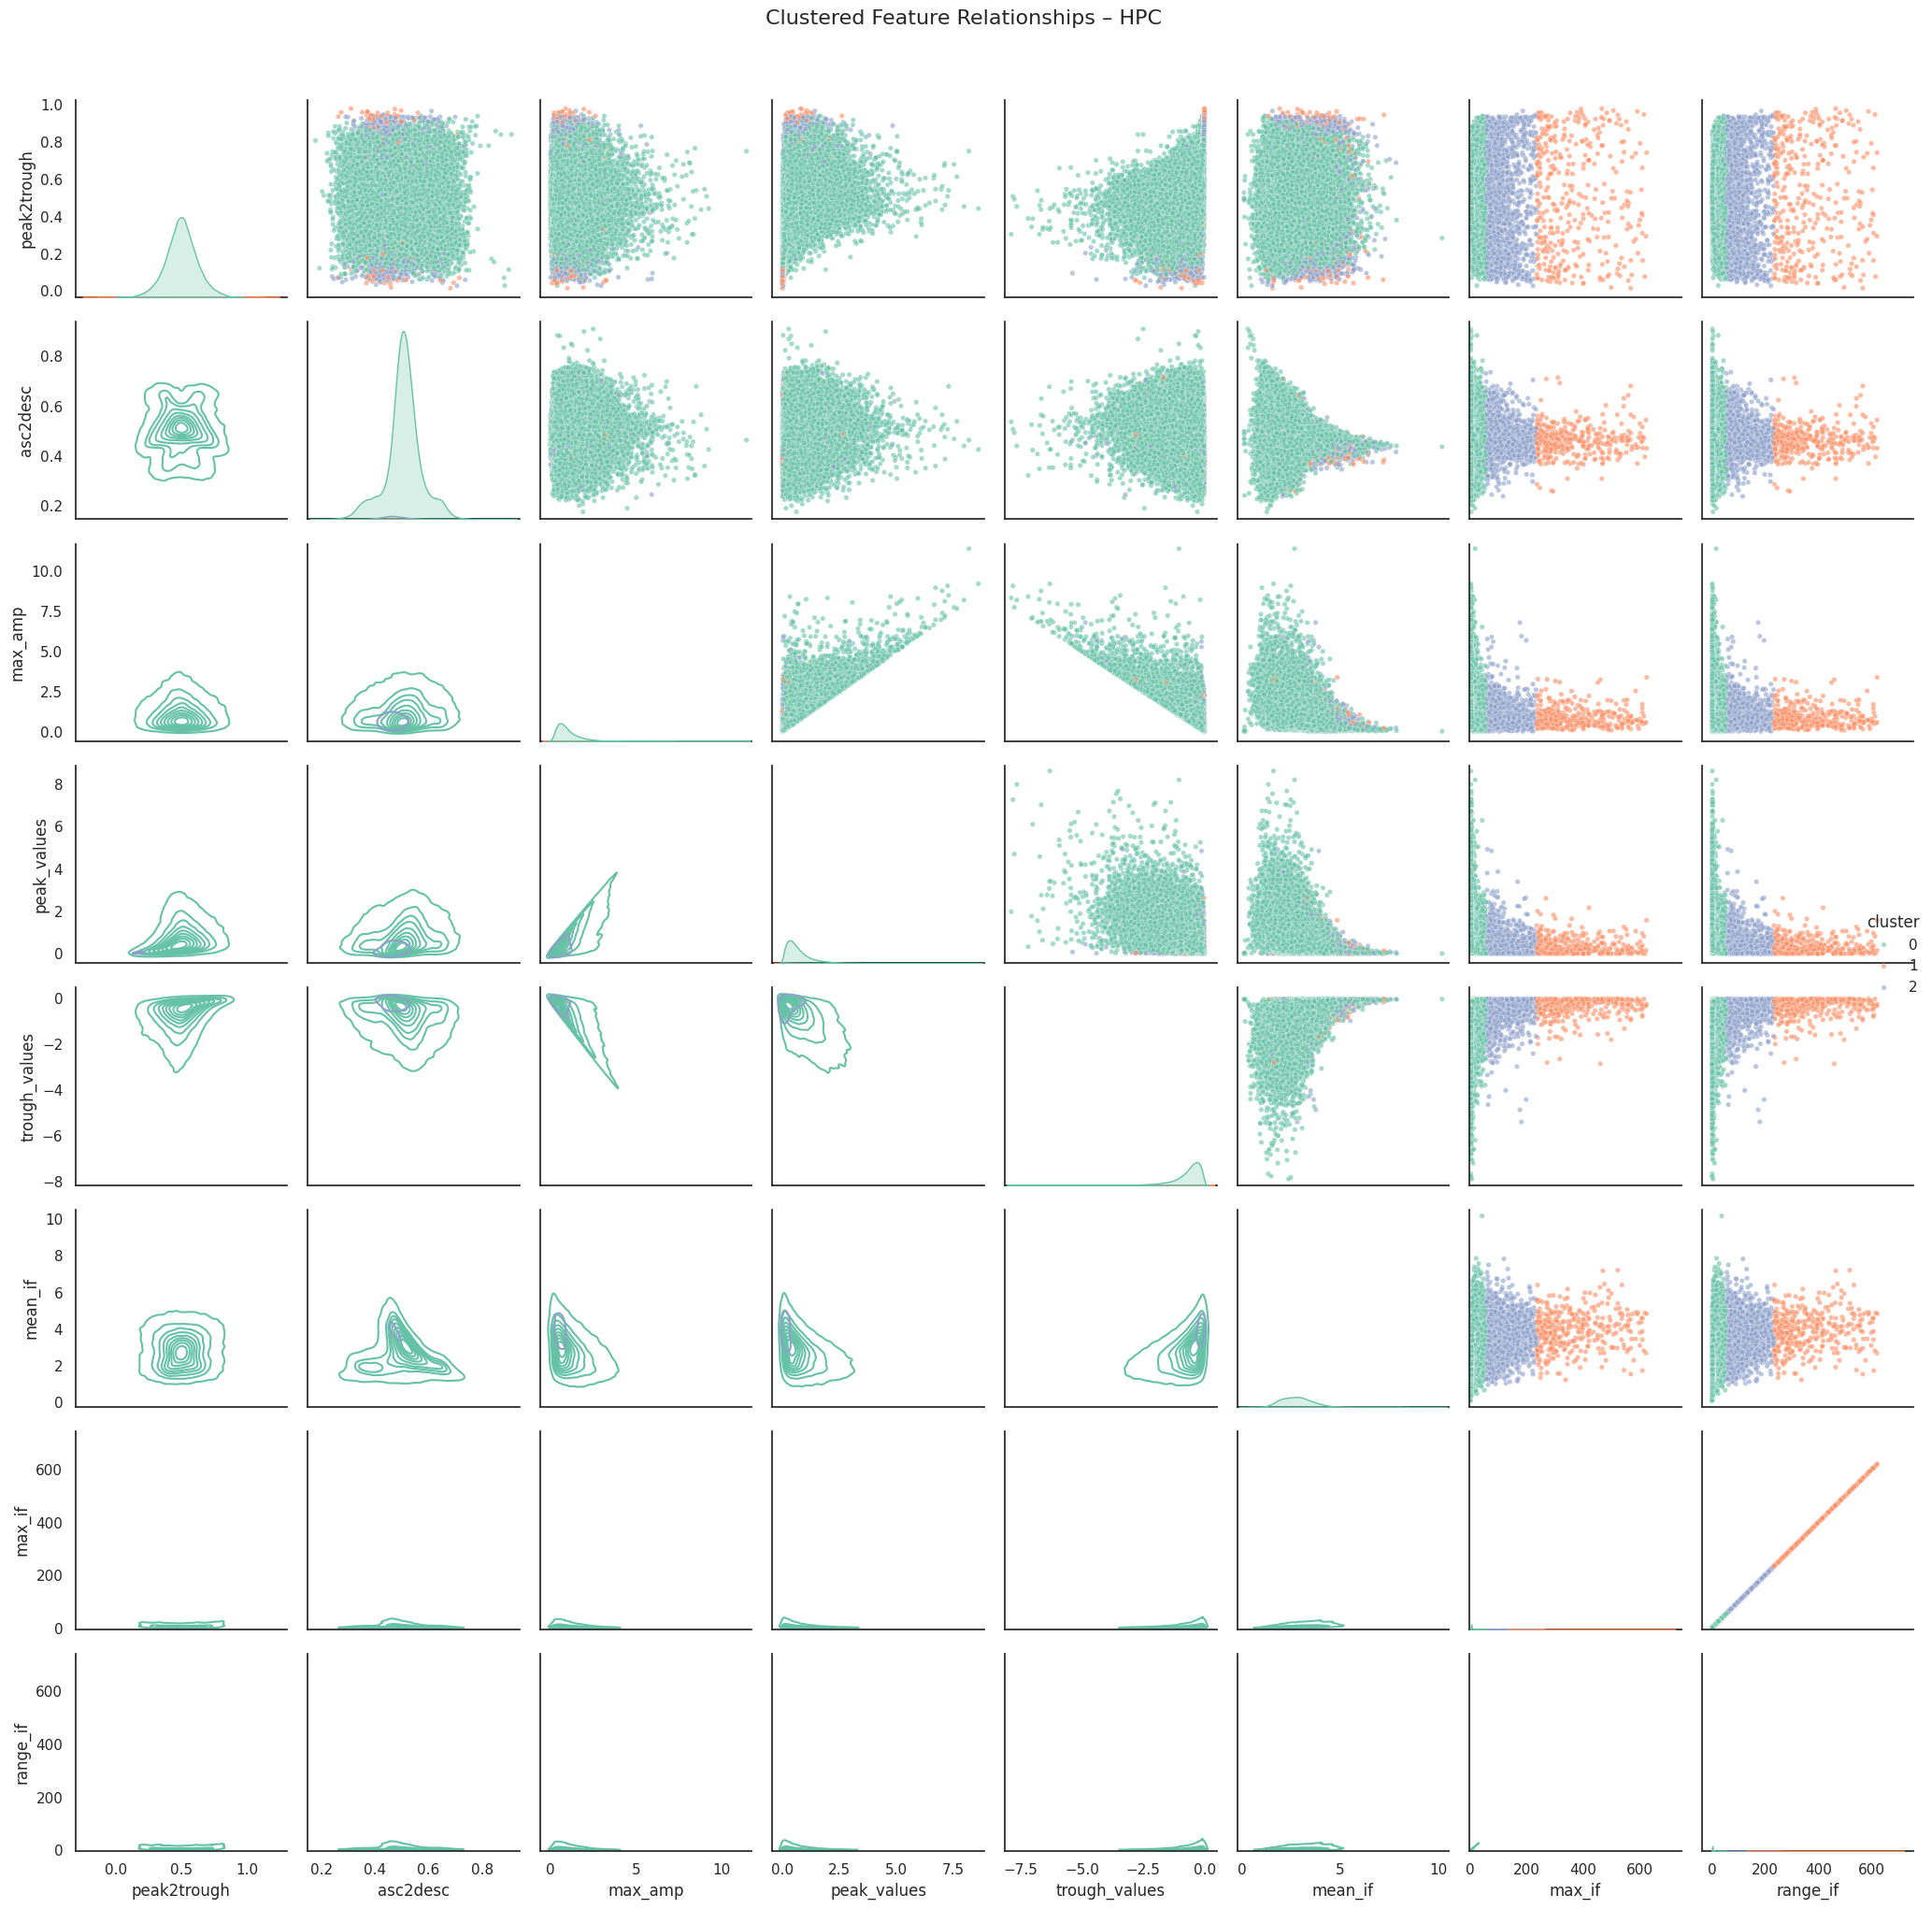

In [ ]:
#plotting scatterplot and density plot
region='HPC'
sns.set(style="white", context="notebook")
g = sns.PairGrid(data_subset, hue='cluster', palette='Set2')
g.map_lower(sns.kdeplot, fill=False)
g.map_diag(sns.kdeplot, fill=True)
g.map_upper(sns.scatterplot, s=15, alpha=0.6)
g.add_legend()

plt.suptitle(f"Clustered Feature Relationships – {region}", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
#similar thing for pfc

In [ ]:
data_subset_pfc = pfc[features].dropna()
#n==3
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(data_subset_pfc)
data_subset_pfc['cluster'] = cluster_labels

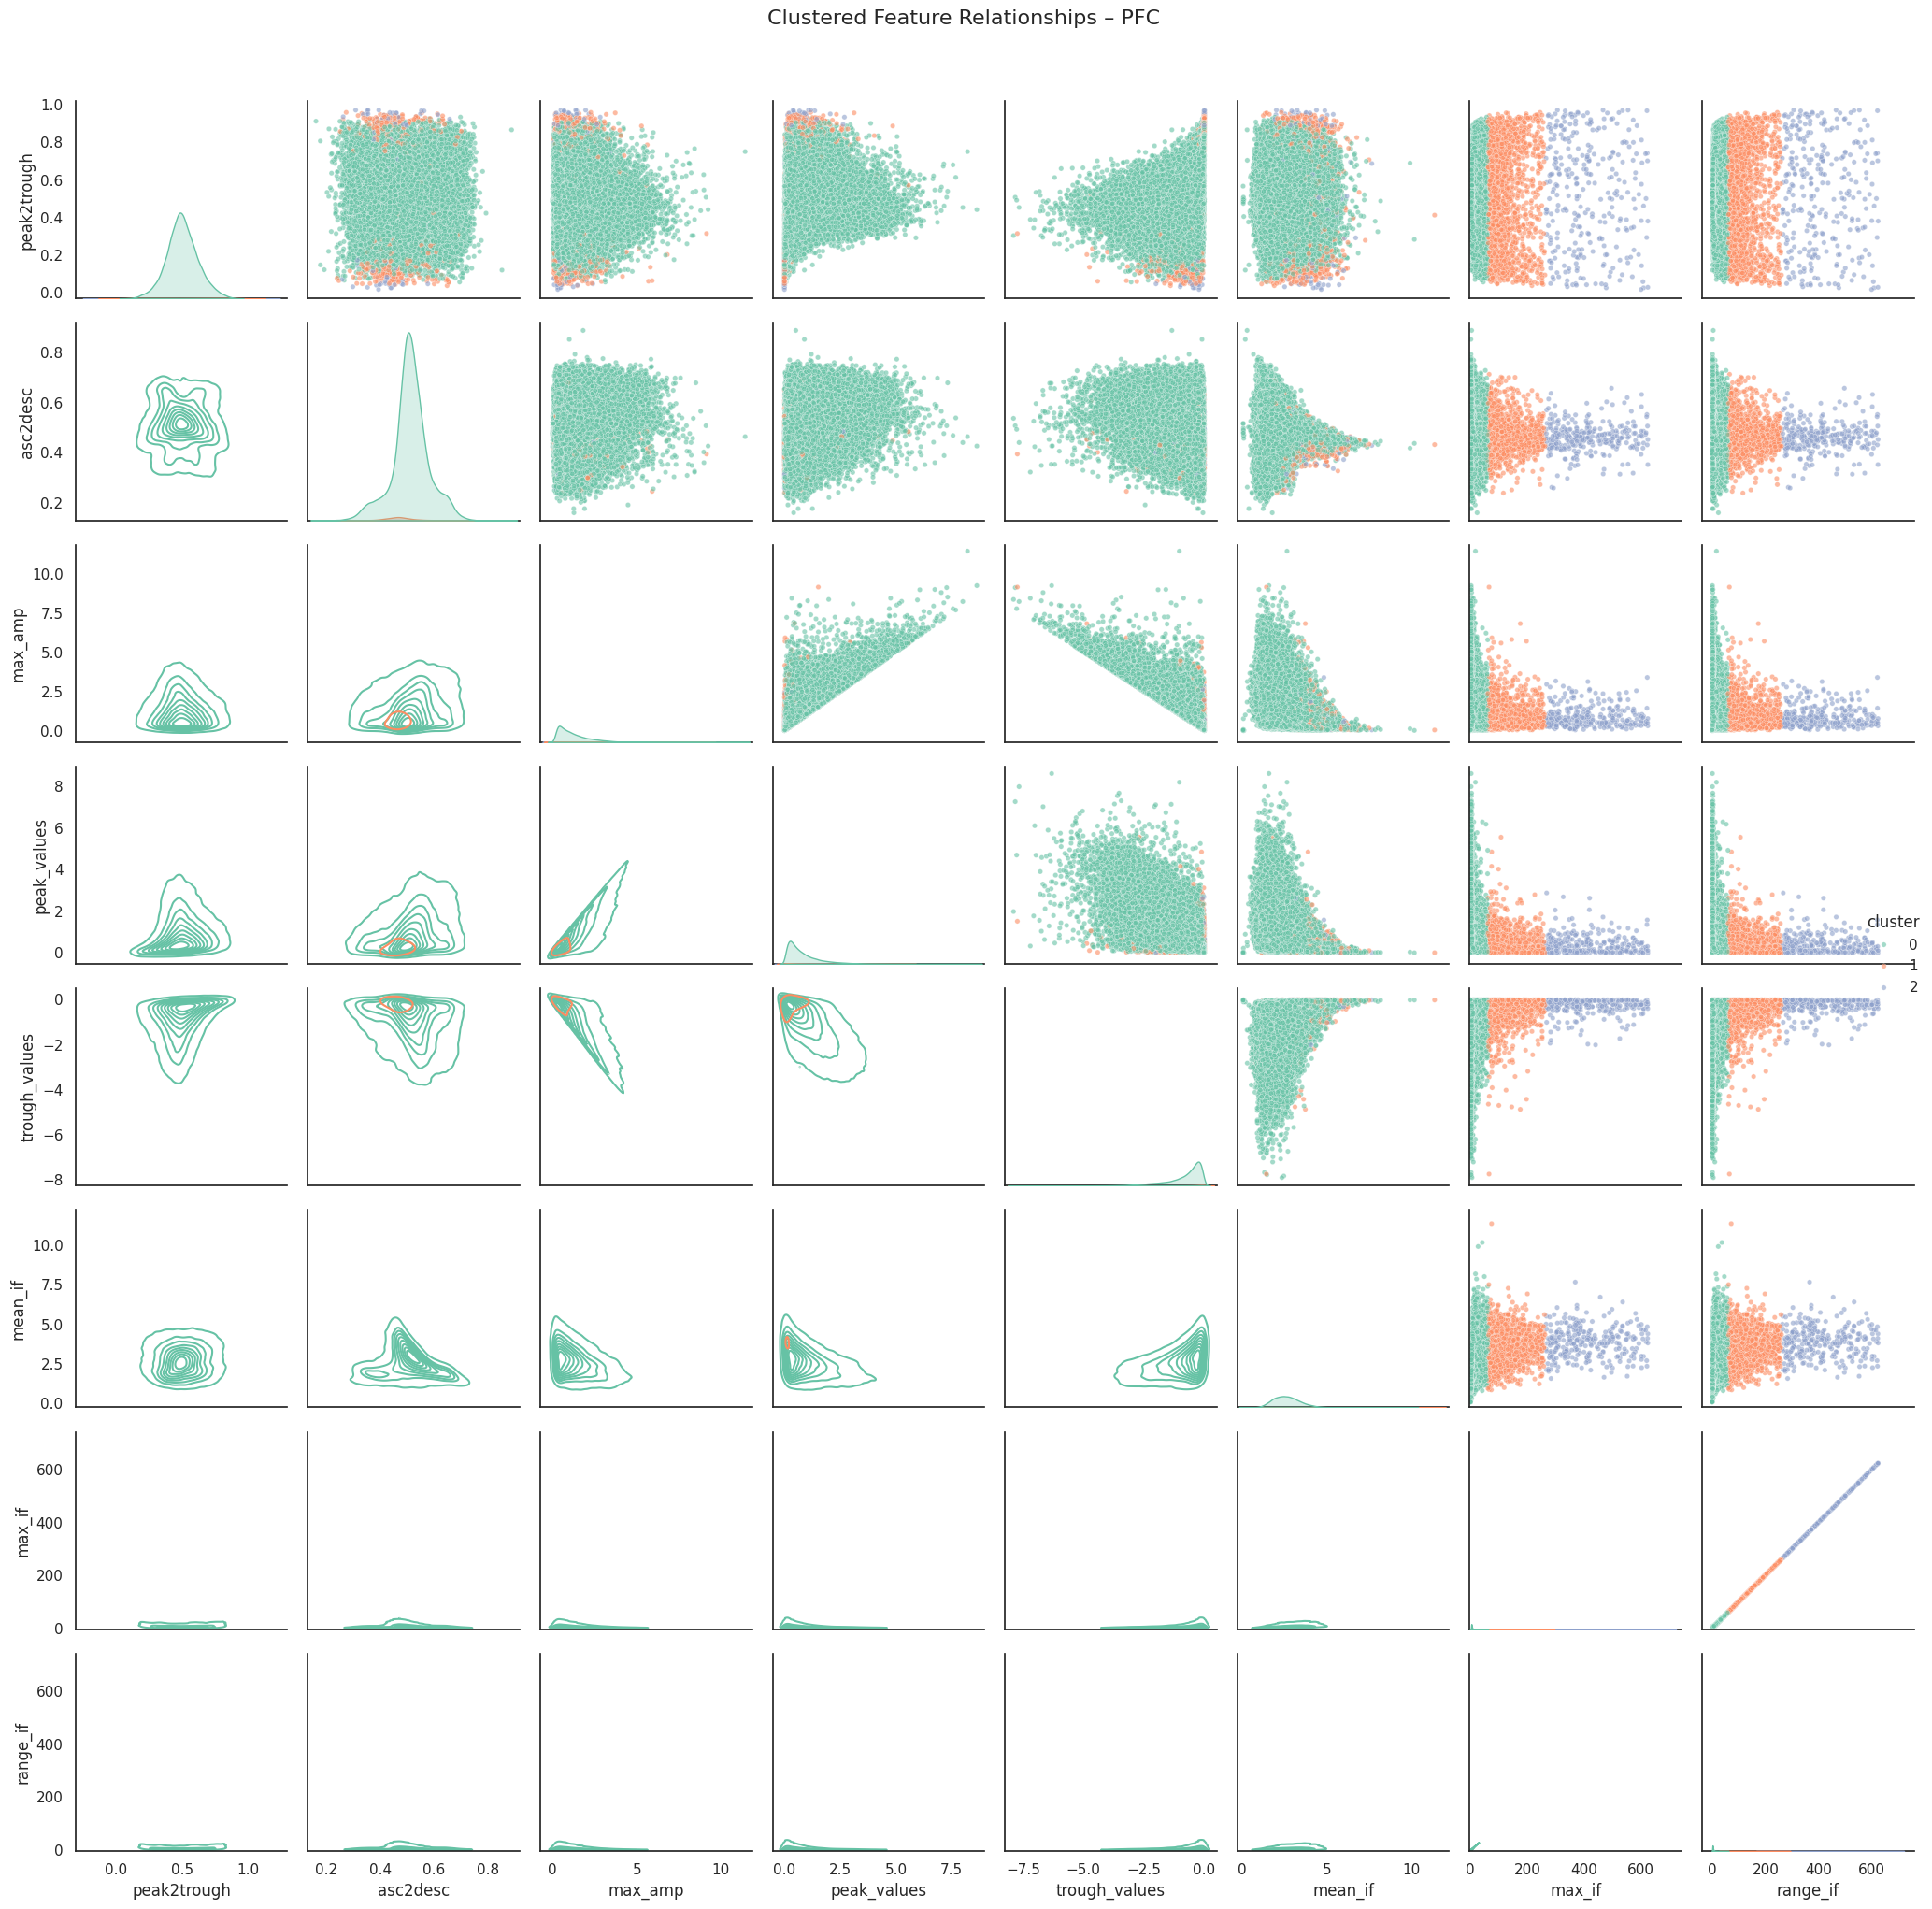

In [ ]:

region='PFC'
# again plotting pairwise relationships but for pfc
sns.set(style="white", context="notebook")
g = sns.PairGrid(data_subset_pfc, hue='cluster', palette='Set2')
g.map_lower(sns.kdeplot, fill=False)
g.map_diag(sns.kdeplot, fill=True)
g.map_upper(sns.scatterplot, s=15, alpha=0.6)
g.add_legend()

plt.suptitle(f"Clustered Feature Relationships – {region}", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

I had done it sequentially that is first for HPC then PFC, so varible names are same run blocks accordingly


Now we need to backtrack raw data!!!
Starting with HPC
lets do rat_id==3, Post_Trial==3, because we have not yet concatenated raw data, but we have complete dataframe for HPC (all rats and pts)

### Sample waveform for each cluster

getting overlaid waveform plots for rat 3 pt 3 pfc/hpc/ starting with laidng raw data

In [ ]:
#loading raw hpc rat3 post trial 3 data
#firstly lets upload raw data
import os
os.chdir('/content/drive/MyDrive/cn/donders/rat3_orn')
from scipy.io import loadmat
raw_post_trial_3_data=loadmat('Cleaned_Trial3_HPC_100_CH15.continuous.mat')

In [ ]:
#loading raw pfc rat3 post trial 3 data
#firstly lets upload raw data
import os
os.chdir('/content/drive/MyDrive/cn/donders/rat3_orn')
from scipy.io import loadmat
raw_post_trial_3_data_pfc=loadmat('Cleaned_Trial3_PFC_100_CH49.continuous.mat')

In [ ]:
raw_post_trial_3_data_pfc.keys()

dict_keys(['__header__', '__version__', '__globals__', 'PFClfpCleaned'])

In [ ]:
raw_post_trial_3_data_pfc=raw_post_trial_3_data_pfc['PFClfpCleaned']

In [ ]:
raw_post_trial_3_data.keys()
raw_post_trial_3_data=raw_post_trial_3_data['HPClfpCleaned']

In [ ]:

# Apply z-score normalization
import numpy as np
from scipy.stats import zscore
zscored_raw_post_trial_3_data_pfc = zscore(raw_post_trial_3_data_pfc, axis=0)
zscored_raw_post_trial_3_data = zscore(raw_post_trial_3_data, axis=0)

hpc

In [ ]:
fs=2500

In [ ]:
new_df_copy = hpc.copy()
new_df_copy.loc[:, 'cluster'] = cluster_labels
cluster0_data_hpc = new_df_copy[new_df_copy['cluster'] == 0]
cluster1_data_hpc= new_df_copy[new_df_copy['cluster'] == 1]
cluster2_data_hpc = new_df_copy[new_df_copy['cluster'] == 2]

In [ ]:
# Apply filters before sampling
cluster0_filtered_hpc= cluster0_data_hpc[(cluster0_data_hpc['rat_id'] == 3) & (cluster0_data_hpc['Post_Trial'] == 3)]
cluster1_filtered_hpc = cluster1_data_hpc[(cluster1_data_hpc['rat_id'] == 3) & (cluster1_data_hpc['Post_Trial'] == 3)]
cluster2_filtered_hpc = cluster2_data_hpc[(cluster2_data_hpc['rat_id'] == 3) & (cluster2_data_hpc['Post_Trial'] == 3)]

# one sample example per cluster
samples = []
for cluster_filtered in [cluster0_filtered_hpc, cluster1_filtered_hpc, cluster2_filtered_hpc]:
    if not cluster_filtered.empty:
        samples.append(cluster_filtered.sample(n=1, random_state=42))
#one smaple dataframe
sampled_df = pd.concat(samples).reset_index(drop=True)
print(sampled_df)


   index  is_good  start_sample  stop_sample  duration  duration_samples  \
0    959        1       2637525      2638550      1026              1026   
1     69        1        299373       300078       706               706   
2   1764        1       4464352      4465353      1002              1002   

   peak2trough  asc2desc   max_amp  trough_values  ...       120       121  \
0     0.319403  0.474856  0.747212      -0.482309  ... -0.147570 -0.128388   
1     0.632270  0.484375  1.925453      -0.411009  ... -0.195142 -0.170266   
2     0.366586  0.543417  0.862930      -0.780653  ... -0.172469 -0.147571   

        122       123       124       125       126       127  rat_id  cluster  
0 -0.108666 -0.088404 -0.067601 -0.046257 -0.024376 -0.001962       3        0  
1 -0.144363 -0.117497 -0.089732 -0.061143 -0.031793 -0.001763       3        1  
2 -0.122768 -0.098099 -0.073605 -0.049325 -0.025298 -0.001562       3        2  

[3 rows x 150 columns]


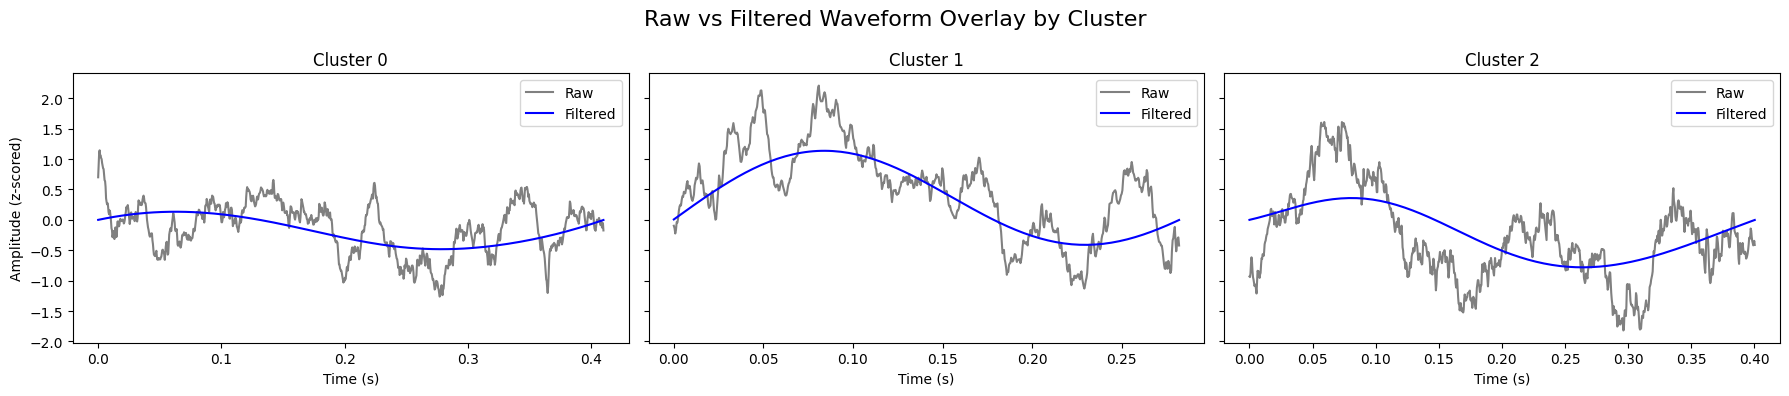

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Sampling frequency
fs = 2500  # Hz

# Extract waveform columns from the dataframe (-130 to -2)
waveform_cols = list(range(0, 128))  # if waveform columns are from col 0 to 127

# Set up 1x3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 4), sharey=True)
fig.suptitle('Raw vs Filtered Waveform Overlay by Cluster', fontsize=16)

for i, row in sampled_df.iterrows():
    start = int(row['start_sample'])
    stop = int(row['stop_sample'])

    # Get raw waveform from zscored_raw_post_trial_3_data
    raw_waveform = zscored_raw_post_trial_3_data[start:stop].flatten()

    # Time axis for raw waveform
    raw_time = np.linspace(0, len(raw_waveform) / fs, len(raw_waveform))

    # Get interpolated filtered waveform from dataframe
    filtered_waveform = row[waveform_cols].values.astype(float)

    # Time axis for filtered waveform (normalized to same duration)
    interp_time = np.linspace(0, len(raw_waveform) / fs, 128)

    # Plot
    ax = axes[i]
    ax.plot(raw_time, raw_waveform, label='Raw', color='gray')
    ax.plot(interp_time, filtered_waveform, label='Filtered', color='blue')

    ax.set_title(f'Cluster {int(row["cluster"])}')
    ax.set_xlabel('Time (s)')
    if i == 0:
        ax.set_ylabel('Amplitude (z-scored)')
    ax.legend()

plt.tight_layout()
plt.show()


##### pfc

In [ ]:
#added later for pfc
new_df_copy_pfc = pfc.copy()
new_df_copy_pfc.loc[:, 'cluster'] = cluster_labels
cluster0_data_pfc = new_df_copy_pfc[new_df_copy_pfc['cluster'] == 0]
cluster1_data_pfc = new_df_copy_pfc[new_df_copy_pfc['cluster'] == 1]
cluster2_data_pfc = new_df_copy_pfc[new_df_copy_pfc['cluster'] == 2]

Random seed used: 509


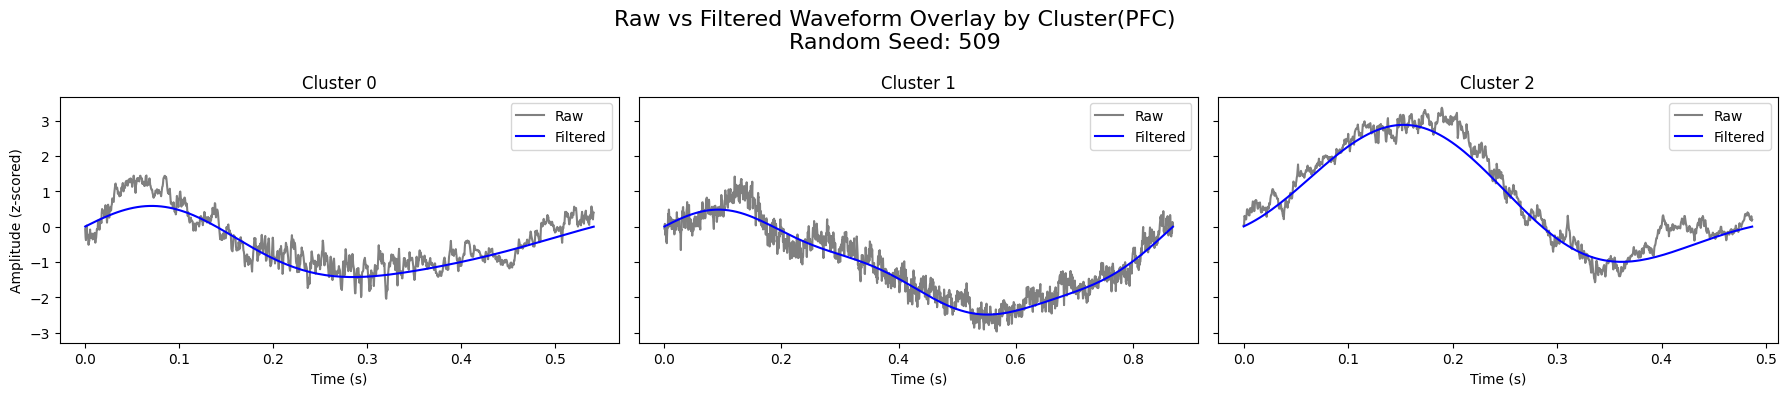

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

# Sampling frequency
fs = 2500  # Hz

# Set or generate random seed
seed = np.random.randint(0, 10000)
print(f"Random seed used: {seed}")
np.random.seed(seed)

# Apply filters before sampling
cluster0_filtered_pfc = cluster0_data_pfc[(cluster0_data_pfc['rat_id'] == 3) & (cluster0_data_pfc['Post_Trial'] == 3)]
cluster1_filtered_pfc = cluster1_data_pfc[(cluster1_data_pfc['rat_id'] == 3) & (cluster1_data_pfc['Post_Trial'] == 3)]
cluster2_filtered_pfc = cluster2_data_pfc[(cluster2_data_pfc['rat_id'] == 3) & (cluster2_data_pfc['Post_Trial'] == 3)]

# Sample one entry from each filtered cluster (if not empty)
samples = []
for cluster_filtered in [cluster0_filtered_pfc, cluster1_filtered_pfc, cluster2_filtered_pfc]:
    if not cluster_filtered.empty:
        samples.append(cluster_filtered.sample(n=1, random_state=seed))

# Concatenate sampled rows into one DataFrame
sampled_df_pfc = pd.concat(samples).reset_index(drop=True)

# Set up 1x3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 4), sharey=True)
fig.suptitle(f'Raw vs Filtered Waveform Overlay by Cluster(PFC)\nRandom Seed: {seed}', fontsize=16)

waveform_cols = list(range(0, 128))

for i, row in sampled_df_pfc.iterrows():
    start = int(row['start_sample'])
    stop = int(row['stop_sample'])

    raw_waveform = zscored_raw_post_trial_3_data_pfc[start:stop].flatten()
    raw_time = np.linspace(0, len(raw_waveform) / fs, len(raw_waveform))

    filtered_waveform = row[waveform_cols].values.astype(float)
    interp_time = np.linspace(0, len(raw_waveform) / fs, 128)

    ax = axes[i]
    ax.plot(raw_time, raw_waveform, label='Raw', color='gray')
    ax.plot(interp_time, filtered_waveform, label='Filtered', color='blue')
    ax.set_title(f'Cluster {int(row["cluster"])}')
    ax.set_xlabel('Time (s)')
    if i == 0:
        ax.set_ylabel('Amplitude (z-scored)')
    ax.legend()

plt.tight_layout()
plt.show()

### pca with features and sleep states projected on pc cloud

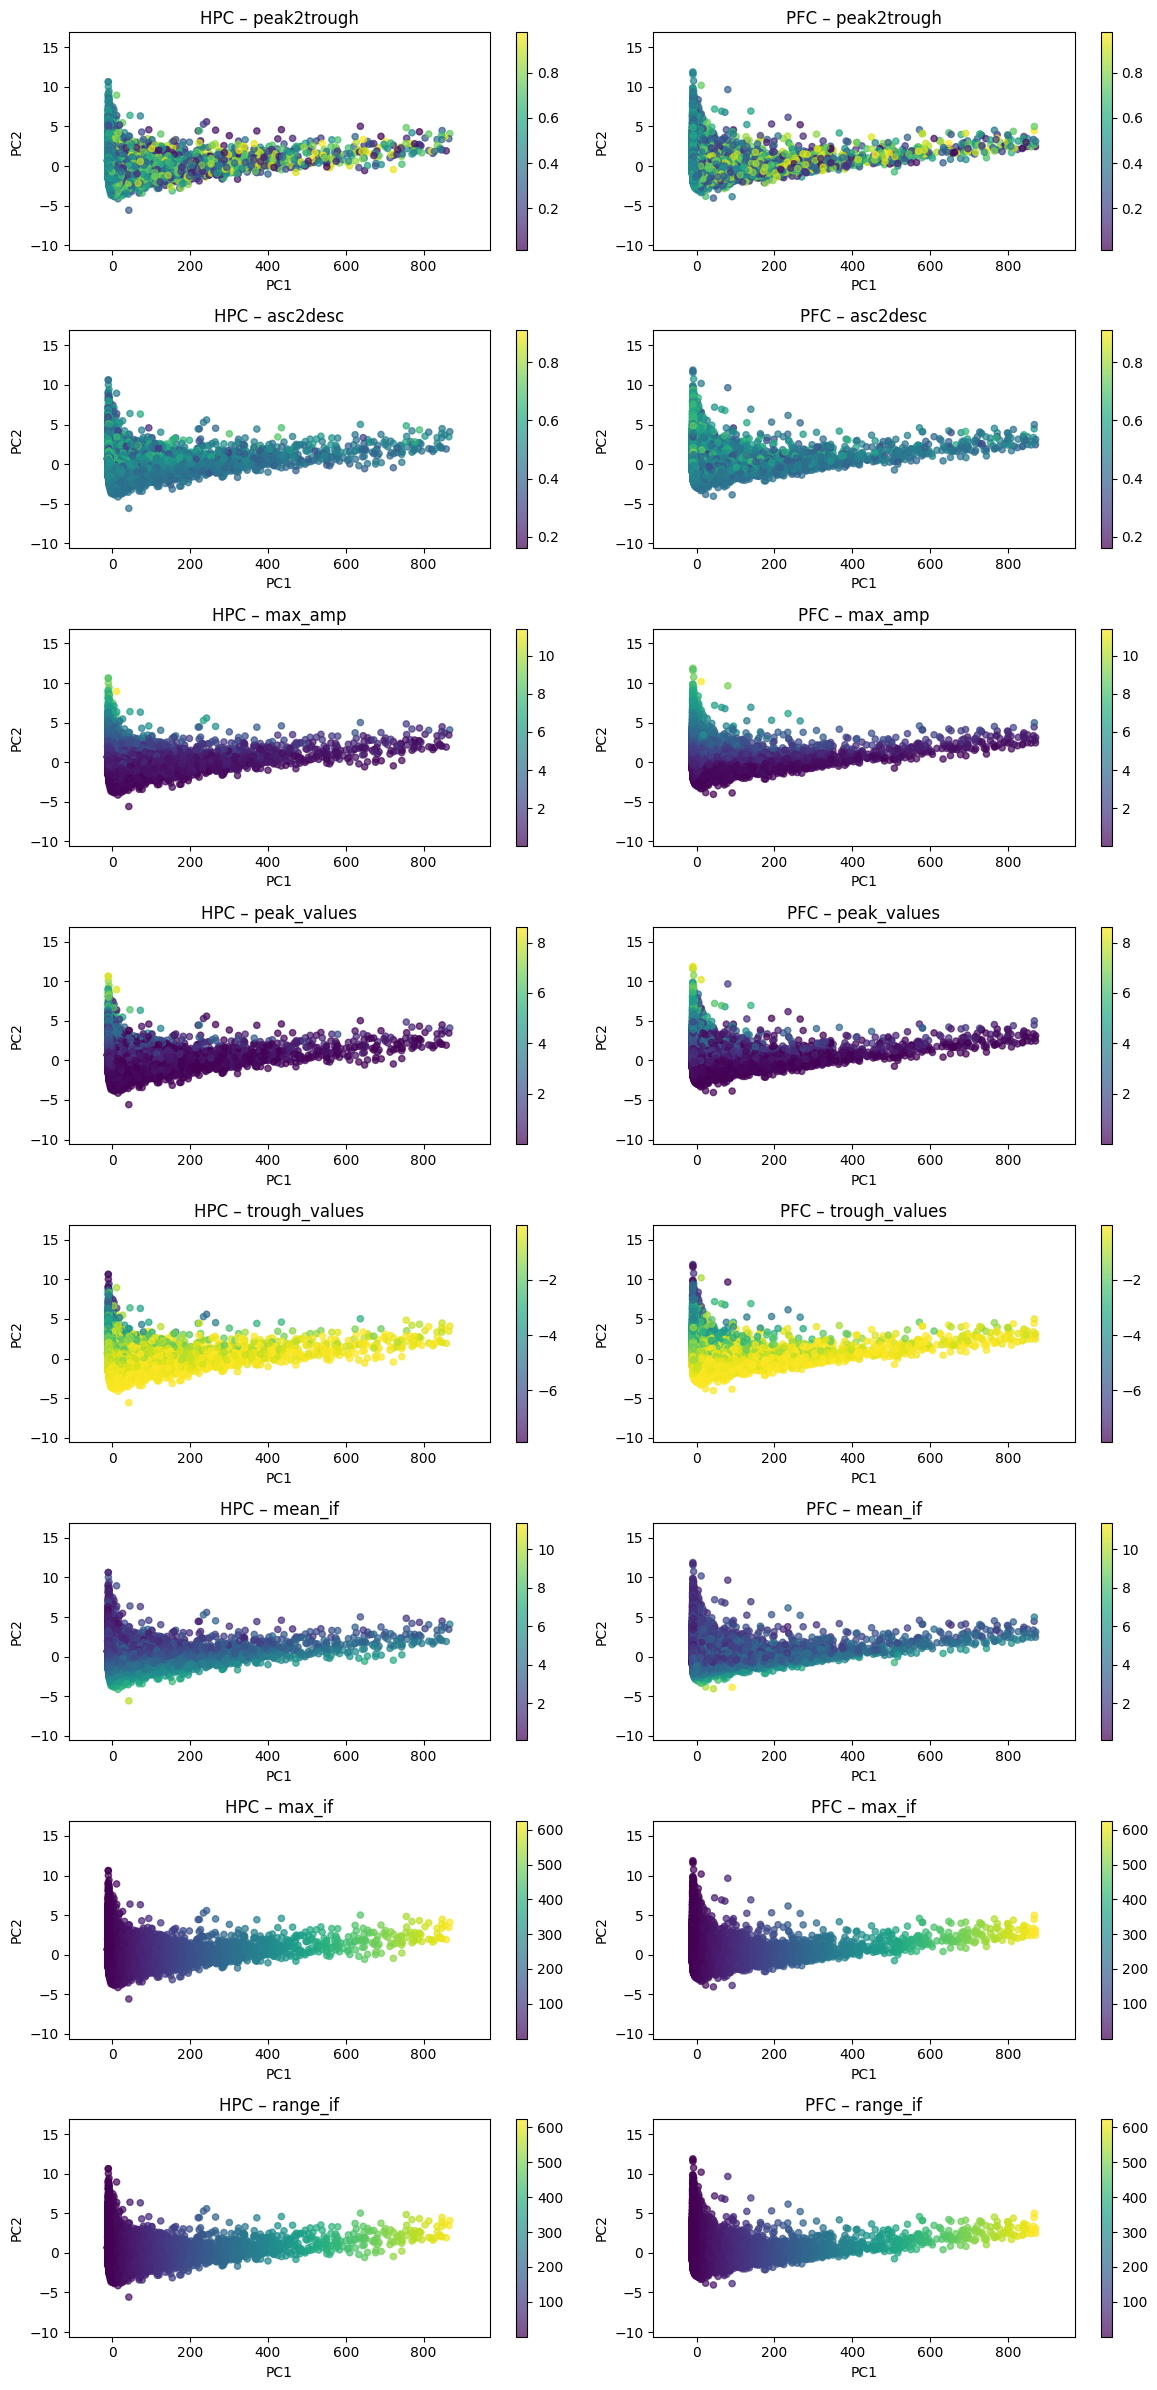

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform separate PCA for HPC and PFC
# Ensure 'hpc' and 'pfc' DataFrames and 'features' list are defined before this point

pca_hpc = PCA(n_components=2).fit_transform(hpc[features])
pca_pfc = PCA(n_components=2).fit_transform(pfc[features])

hpc_df = pd.DataFrame(pca_hpc, columns=["PC1", "PC2"])
pfc_df = pd.DataFrame(pca_pfc, columns=["PC1", "PC2"])

# Compute shared axis limits across both PCA projections/ to keep the axis range same for comparison
pc1_all = np.concatenate([hpc_df["PC1"], pfc_df["PC1"]])
pc2_all = np.concatenate([hpc_df["PC2"], pfc_df["PC2"]])
xlim = (pc1_all.min()-100, pc1_all.max()+100)
ylim = (pc2_all.min()-5, pc2_all.max()+5)

#plotting
n_features = len(features)
fig, axes = plt.subplots(n_features, 2, figsize=(12, n_features * 3))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i, feature in enumerate(features):
    # Calculate shared colorbar limits for the current feature pair
    vmin = min(hpc[feature].min(), pfc[feature].min())
    vmax = max(hpc[feature].max(), pfc[feature].max())

    # HPC plot (left column)
    sc1 = axes[i, 0].scatter(hpc_df["PC1"], hpc_df["PC2"], c=hpc[feature],
                             cmap="viridis", vmin=vmin, vmax=vmax, alpha=0.7, s=20)
    axes[i, 0].set_title(f"HPC – {feature}")
    axes[i, 0].set_xlim(xlim)
    axes[i, 0].set_ylim(ylim)
    axes[i, 0].set_xlabel("PC1")
    axes[i, 0].set_ylabel("PC2")
    fig.colorbar(sc1, ax=axes[i, 0])

    # PFC plot (right column)
    sc2 = axes[i, 1].scatter(pfc_df["PC1"], pfc_df["PC2"], c=pfc[feature],
                             cmap="viridis", vmin=vmin, vmax=vmax, alpha=0.7, s=20)
    axes[i, 1].set_title(f"PFC – {feature}")
    axes[i, 1].set_xlim(xlim)
    axes[i, 1].set_ylim(ylim)
    axes[i, 1].set_xlabel("PC1")
    axes[i, 1].set_ylabel("PC2")
    fig.colorbar(sc2, ax=axes[i, 1])

plt.tight_layout()
plt.show()

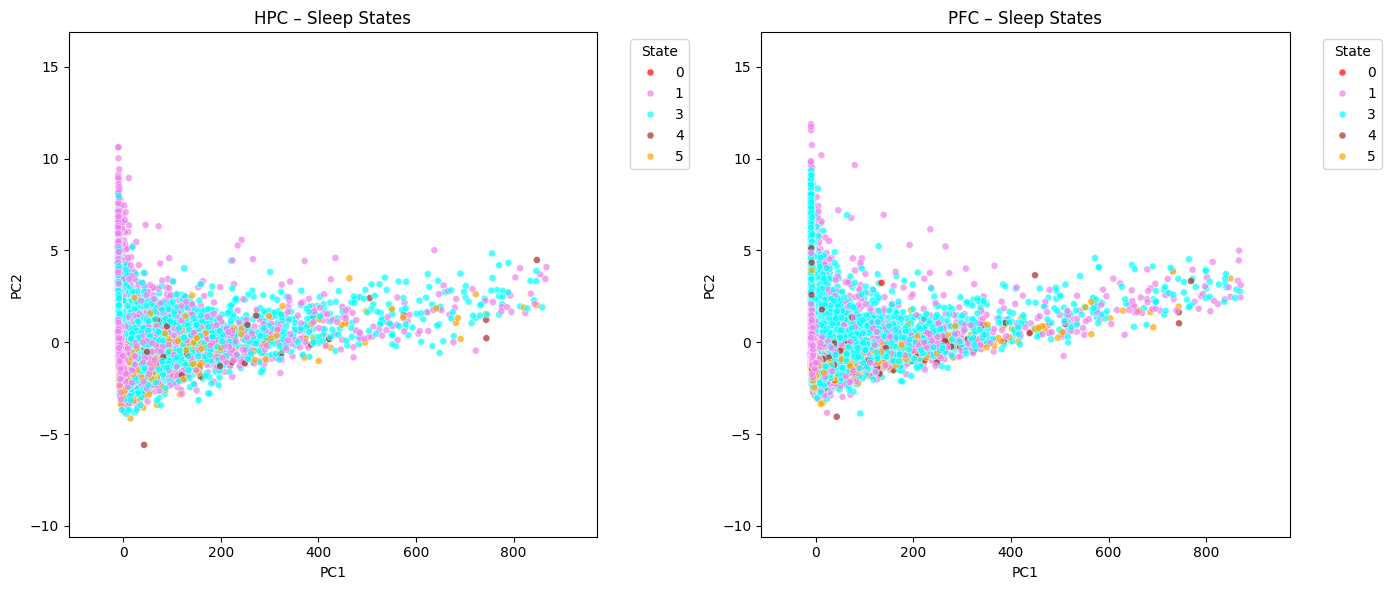

In [ ]:
#this proejcts all sleep states together
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Perform PCA (2 components) on spike features
pca_hpc = PCA(n_components=2).fit_transform(hpc[features])
pca_pfc = PCA(n_components=2).fit_transform(pfc[features])

# Add PCA results to DataFrames
hpc_df = pd.DataFrame(pca_hpc, columns=["PC1", "PC2"])
pfc_df = pd.DataFrame(pca_pfc, columns=["PC1", "PC2"])
hpc_df["State"] = hpc["State"].values
pfc_df["State"] = pfc["State"].values

# Compute shared axis limits
pc1_all = np.concatenate([hpc_df["PC1"], pfc_df["PC1"]])
pc2_all = np.concatenate([hpc_df["PC2"], pfc_df["PC2"]])
xlim = (pc1_all.min() - 100, pc1_all.max() + 100)
ylim = (pc2_all.min() - 5, pc2_all.max() + 5)


#custom colors
custom_palette = ["red", "violet", "cyan", "brown", "orange"]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# HPC subplot
sns.scatterplot(data=hpc_df, x="PC1", y="PC2", hue="State", palette=custom_palette, ax=axes[0], alpha=0.7, s=25)
axes[0].set_title("HPC – Sleep States")
axes[0].set_xlim(xlim)
axes[0].set_ylim(ylim)

# PFC subplot
sns.scatterplot(data=pfc_df, x="PC1", y="PC2", hue="State", palette=custom_palette, ax=axes[1], alpha=0.7, s=25)
axes[1].set_title("PFC – Sleep States")
axes[1].set_xlim(xlim)
axes[1].set_ylim(ylim)

# Formatting
axes[0].legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()
plt.show()

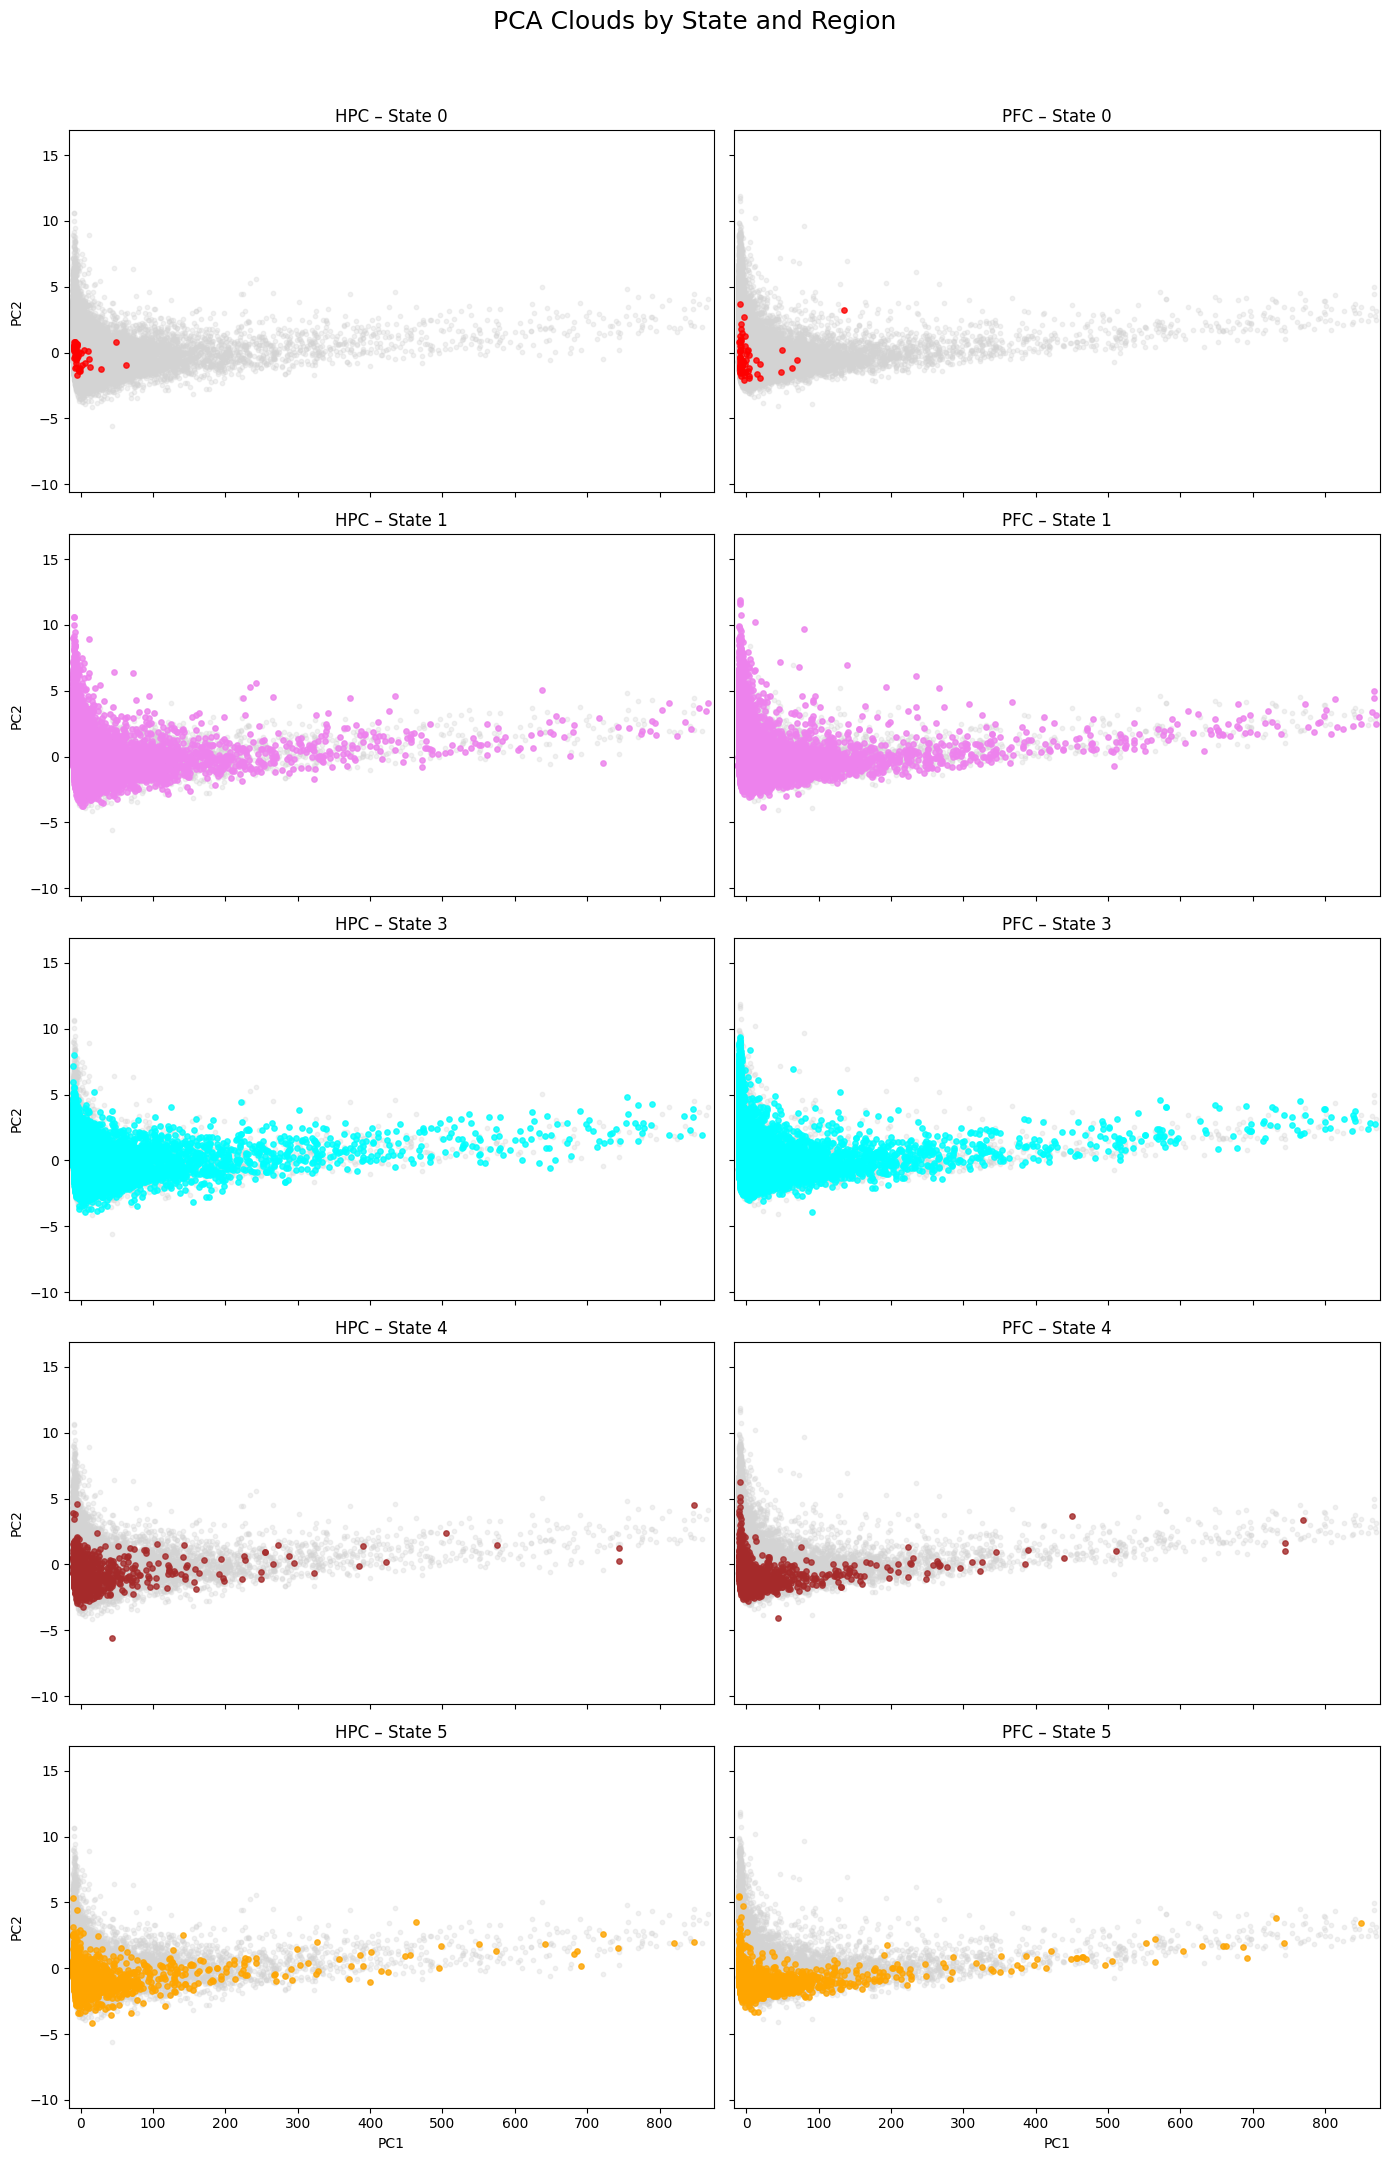

In [ ]:
# individual projection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Perform PCA on features
pca_hpc = PCA(n_components=2).fit_transform(hpc[features])
pca_pfc = PCA(n_components=2).fit_transform(pfc[features])

# Add PC info to DataFrames
hpc_df = pd.DataFrame(pca_hpc, columns=["PC1", "PC2"])
pfc_df = pd.DataFrame(pca_pfc, columns=["PC1", "PC2"])
hpc_df["State"] = hpc["State"].values
pfc_df["State"] = pfc["State"].values
hpc_df["Region"] = "HPC"
pfc_df["Region"] = "PFC"

# Combine into one DataFrame
combined_df = pd.concat([hpc_df, pfc_df], ignore_index=True)

# Only plot actual sleep states
states = [0, 1, 3, 4, 5]

# Fixed color palette
state_palette = {
    0: "red",
    1: "violet",
    3: "cyan",
    4: "brown",
    5: "orange"
}

# Shared axis limits
xlim = (combined_df["PC1"].min() - 5, combined_df["PC1"].max() + 5)
ylim = (combined_df["PC2"].min() - 5, combined_df["PC2"].max() + 5)

# Plot 5x2 subplots
fig, axes = plt.subplots(5, 2, figsize=(14, 22), sharex=True, sharey=True)
fig.suptitle("PCA Clouds by State and Region", fontsize=18)

for i, state in enumerate(states):
    for j, region in enumerate(["HPC", "PFC"]):
        ax = axes[i, j]
        region_data = combined_df[combined_df["Region"] == region]

        # Plot full background cloud faintly
        ax.scatter(region_data["PC1"], region_data["PC2"], color='lightgray', alpha=0.3, s=10)

        # Highlight this state's points
        highlight = region_data[region_data["State"] == state]
        ax.scatter(highlight["PC1"], highlight["PC2"], color=state_palette[state], alpha=0.8, s=15, label=f"State {state}")

        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.set_title(f"{region} – State {state}")
        if i == 4:
            ax.set_xlabel("PC1")
        if j == 0:
            ax.set_ylabel("PC2")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
